## Колокації

Одним із важливих аспектів будь-якої природної мови є сполучуваність слів. В англійській мові поняття сполучуваності дуже відчутне і присутнє у всіх мовних структурах: ми кажемо _"make a mistake",_ але _"do a favour";_ ми кажемо _"big surprise",_ але _"great anger";_ ми кажемо _"highly unlikely",_ але _"seriously wrong"._

У цьому завданні вам потрібно дослідити сполучуваність дієслів одного синонімного ряду з прислівниками. Наприклад, ми частіше кажемо _"love somebody dearly", "honor somebody highly",_ але _"admire somebody greatly"._

**Завдання:**
1. продовжте синонімний ряд дієслів: _"say", "tell", "speak", "claim", "communicate"_
2. напишіть функцію, яка знаходить у реченні дієслово (за складеним раніше синонімним рядом) і витягає усі можливі прислівники на "-ly", якими це дієслово керує
3. напишіть програму, яка знайде усі можливі прислівники для наших дієслів у [корпусі блогів](blog2008.txt)
4. на виході програма повинна видати десять найчастотніших прислівників для кожного дієслова (разом із частотою). Приклад виводу:
	```
	say: (loudly, 51), (silently, 45), (quietly, 10)
	tell: (quietly, 100), (loudly, 61), (seriously, 5)
	```
5. збережіть програму та результати аналізу на корпусі (вивід) у директорії з вашим іменем

Синоніми можна знайти у тезаурусах (http://www.thesaurus.com/, https://www.merriam-webster.com/thesaurus) чи [WordNet](http://wordnetweb.princeton.edu/perl/webwn).

Корпус блогів взятий з [Political Blog Corpora](http://www.cs.cmu.edu/~ark/blog-data/).

Ви можете використати будь-яку мову програмування та будь-яку NLP-бібліотеку.

P.S. Зверніть увагу на те, що у природній мові дієслова можуть мати різні форми, а прислівників може бути по декілька.

In [1]:
from nltk.corpus import wordnet as wn
import spacy
nlp = spacy.load('en')

print("Synonyms to 'say':")
print(wn.synsets("say"))
print("Synonyms to 'tell':")
print(wn.synsets("tell"))

Synonyms to 'say':
[Synset('say.n.01'), Synset('state.v.01'), Synset('allege.v.01'), Synset('suppose.v.01'), Synset('read.v.02'), Synset('order.v.01'), Synset('pronounce.v.01'), Synset('say.v.07'), Synset('say.v.08'), Synset('say.v.09'), Synset('say.v.10'), Synset('say.v.11')]
Synonyms to 'tell':
[Synset('tell.n.01'), Synset('state.v.01'), Synset('tell.v.02'), Synset('tell.v.03'), Synset('order.v.01'), Synset('tell.v.05'), Synset('assure.v.02'), Synset('tell.v.07'), Synset('distinguish.v.01')]


Synonyms are added using WordNet and thesaurus on merriam-webster.com

In [2]:
verbs = ["say", "tell", "speak", "claim", "communicate", "state", "assure", "talk", "formulate", "report"]
corpus_file = open('blog2008.txt', "r")

In [11]:
import re
from collections import Counter

def process_sent(verbs, sentence):
    tokens = nlp(sentence)
    cnt = Counter()
    for token in tokens:
        if token.pos_ == 'ADV' and token.text[-2:] == 'ly' and token.dep_ == 'advmod':
            for anc in token.ancestors:
                if anc.lemma_ in verbs and anc.pos_ == 'VERB':
                    cnt.update({(anc.lemma_, token.lower_):1})
    return cnt

def get_verb_collocations(verbs, lines):
    '''Find dependencies between verb and adverb such as say loudly, tell quitly'''
    overall_cnt = Counter()
    
    # To optimize calculation a liitle
    regexp_ly = re.compile('.+ly.+?(?=\s|$)')
    
    for line in lines:
        if regexp_ly.match(line):
            overall_cnt.update(process_sent(verbs, line))
    
    return overall_cnt

lines                 
collocations_cnt = get_verb_collocations(verbs, lines)

In [12]:
# Format results
collocations_dict = {}
for verb in verbs:
    adverbs_with_counts = []
    for verb_adv in collocations_cnt:
        vrb, adv = verb_adv
        if vrb == verb:
            adverbs_with_counts.append((adv, collocations_cnt[verb_adv]))
    top_10_adverbs = sorted(adverbs_with_counts, key=lambda x: x[1], reverse=True)[:10]     
    collocations_dict.update({verb: top_10_adverbs})

In [13]:
collocations_dict

{'assure': [('only', 5),
  ('privately', 4),
  ('really', 3),
  ('apparently', 2),
  ('exactly', 2),
  ('virtually', 2),
  ('falsely', 2),
  ('actually', 2),
  ('fully', 2),
  ('immediately', 2)],
 'claim': [('falsely', 68),
  ('only', 65),
  ('actually', 23),
  ('simply', 18),
  ('really', 17),
  ('nearly', 14),
  ('repeatedly', 12),
  ('merely', 11),
  ('previously', 10),
  ('apparently', 8)],
 'communicate': [('effectively', 4),
  ('directly', 3),
  ('freely', 1),
  ('really', 1),
  ('only', 1),
  ('verbally', 1),
  ('apparently', 1),
  ('loudly', 1),
  ('hopefully', 1),
  ('daily', 1)],
 'formulate': [('only', 1), ('actually', 1), ('usually', 1), ('daily', 1)],
 'report': [('recently', 42),
  ('only', 39),
  ('actually', 27),
  ('previously', 23),
  ('widely', 21),
  ('nearly', 18),
  ('apparently', 17),
  ('finally', 16),
  ('early', 16),
  ('directly', 11)],
 'say': [('only', 468),
  ('really', 272),
  ('actually', 220),
  ('simply', 140),
  ('probably', 127),
  ('recently', 125)

In [4]:
dict_for_visualization = {}
for verb in collocations_dict:
    visual_extra_dict = {}
    for adverb, count in collocations_dict[verb]:
        visual_extra_dict.update({verb + ' ' + adverb: count})
    dict_for_visualization.update({verb: visual_extra_dict})

In [15]:
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

# save_obj(dict_for_visualization, 'my_collocations')
dict_for_visualization = load_obj('my_collocations')

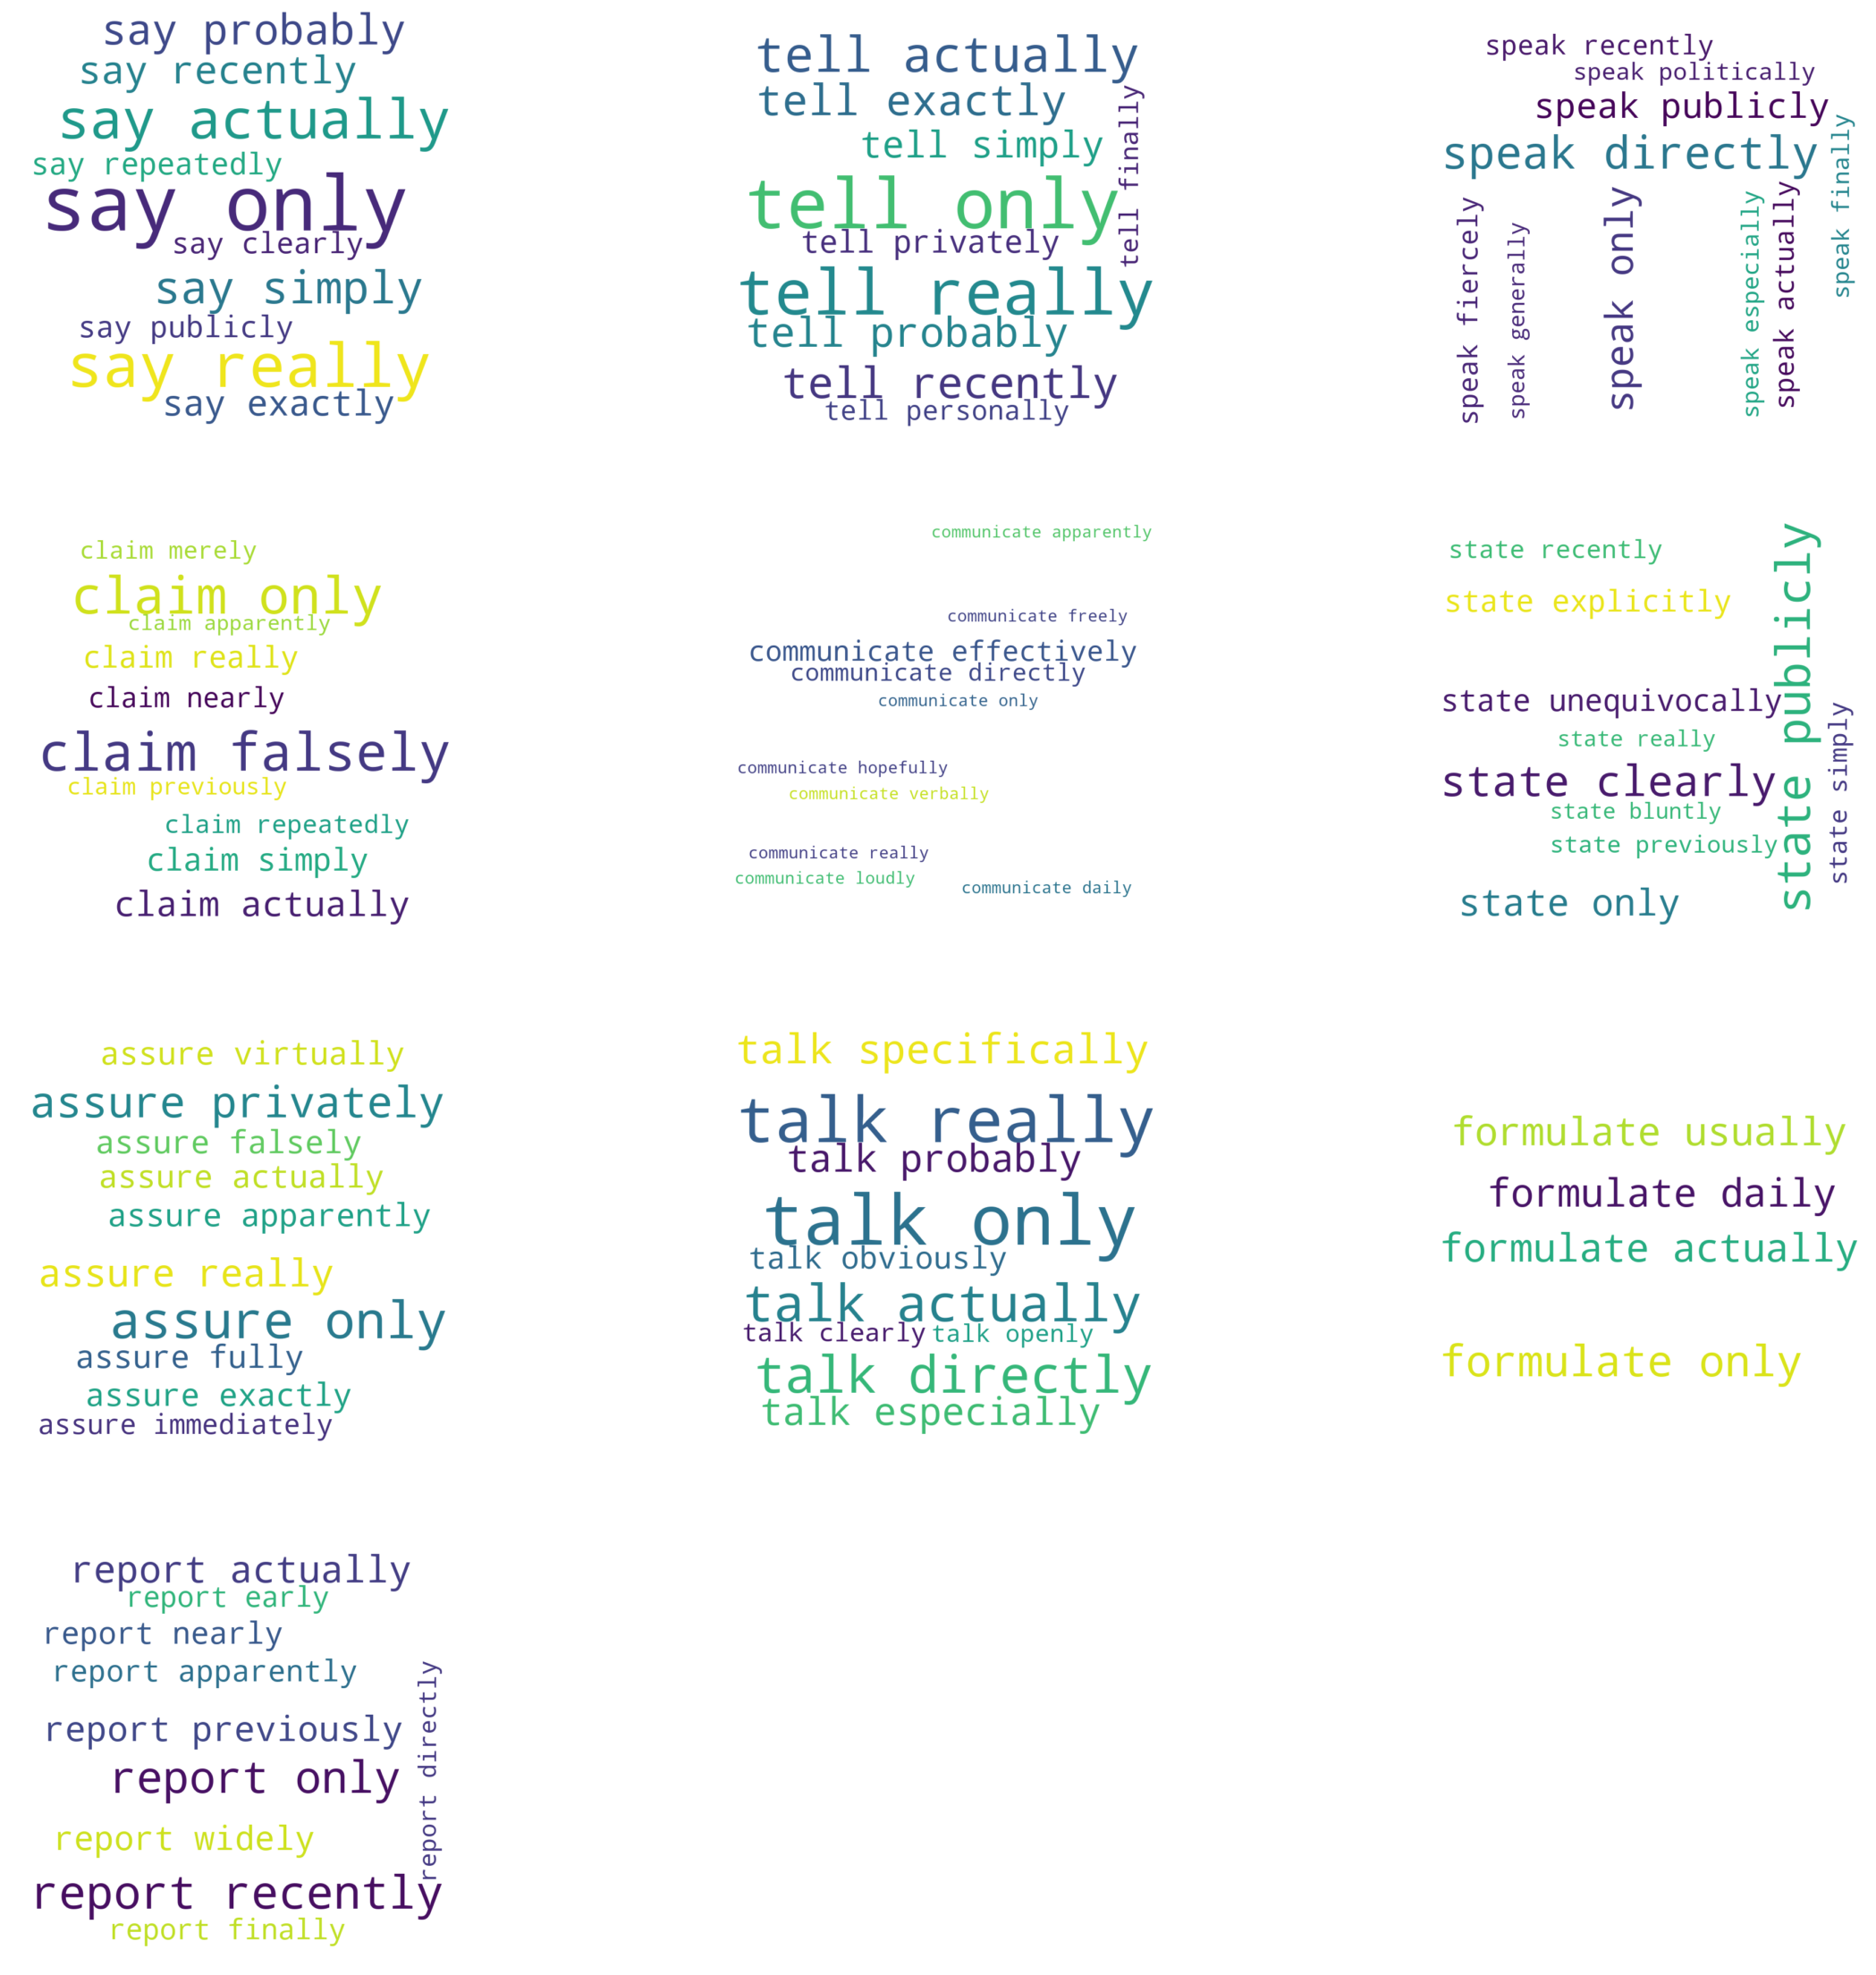

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_picture(dict_for_visualization):
    
    fig=plt.figure(figsize=(40, 40))
    rows = 4
    columns = 3
    
    for i, verb in enumerate(dict_for_visualization, 1):
        
        word_freqs = dict_for_visualization[verb]
        
        wordcloud = WordCloud(width = 800,
                              height = 800,
                              background_color ='white',
                              min_font_size = 8).generate_from_frequencies(word_freqs)
        
        fig.add_subplot(rows, columns, i)
        
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
    plt.show()
    
wordcloud_picture(dict_for_visualization)